<a href="https://colab.research.google.com/github/Fliptoss/ML_stuff/blob/main/PolynomialRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

Text(0, 0.5, 'Y dataset')

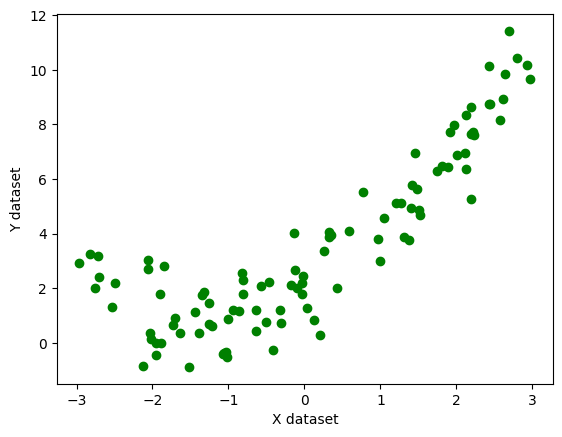

In [3]:
X = 6 * np.random.rand(100, 1) - 3
y = 0.5 * X**2 + 1.5*X + 2 + np.random.randn(100,1)

plt.scatter(X, y, color='g')
plt.xlabel('X dataset')
plt.ylabel('Y dataset')

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [8]:
from sklearn.metrics import r2_score
y_pred = regression.predict(X_test)
r2_score(y_test, y_pred)

0.6883373803573289

Text(0, 0.5, 'Y dataset')

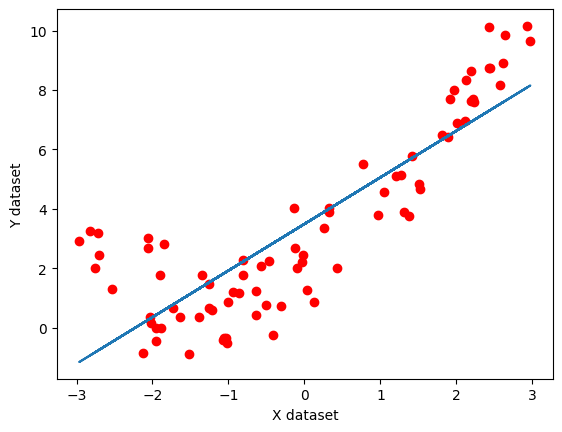

In [9]:
plt.plot(X_train, regression.predict(X_train))
plt.scatter(X_train, y_train, color='r')
plt.xlabel('X dataset')
plt.ylabel('Y dataset')

In [10]:
#insert polynomial regression
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [11]:
X_train_poly

array([[ 1.00000000e+00, -2.12854582e+00,  4.53070733e+00],
       [ 1.00000000e+00, -5.03720398e-01,  2.53734240e-01],
       [ 1.00000000e+00, -1.26081255e+00,  1.58964829e+00],
       [ 1.00000000e+00, -2.03403202e+00,  4.13728626e+00],
       [ 1.00000000e+00, -1.00654302e+00,  1.01312884e+00],
       [ 1.00000000e+00,  1.88364101e+00,  3.54810346e+00],
       [ 1.00000000e+00,  2.43461057e+00,  5.92732864e+00],
       [ 1.00000000e+00, -1.64252247e+00,  2.69788007e+00],
       [ 1.00000000e+00,  1.42158582e+00,  2.02090626e+00],
       [ 1.00000000e+00, -2.96126585e+00,  8.76909543e+00],
       [ 1.00000000e+00, -8.12533542e-01,  6.60210757e-01],
       [ 1.00000000e+00,  2.57982258e+00,  6.65548455e+00],
       [ 1.00000000e+00, -9.46335235e-01,  8.95550377e-01],
       [ 1.00000000e+00, -1.02396719e+00,  1.04850880e+00],
       [ 1.00000000e+00,  2.93120834e+00,  8.59198232e+00],
       [ 1.00000000e+00,  4.33546674e-01,  1.87962719e-01],
       [ 1.00000000e+00,  2.61337026e+00

In [18]:
from sklearn.metrics import r2_score
regression_poly = LinearRegression()
regression_poly.fit(X_train_poly, y_train)
y_pred_poly = regression_poly.predict(X_test_poly)
score = r2_score(y_test, y_pred_poly)
print(score)

0.8602162802109014


In [20]:
print(regression_poly.coef_)

[[0.         1.48406629 0.52750184]]


In [21]:
print(regression_poly.intercept_)

[1.96728796]


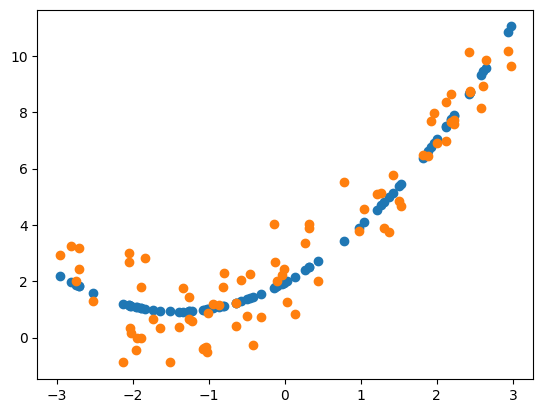

In [23]:
plt.scatter(X_train, regression_poly.predict(X_train_poly))
plt.scatter(X_train, y_train)

In [24]:
#insert polynomial regression
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3, include_bias=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [25]:
from sklearn.metrics import r2_score
regression_poly = LinearRegression()
regression_poly.fit(X_train_poly, y_train)
y_pred_poly = regression_poly.predict(X_test_poly)
score = r2_score(y_test, y_pred_poly)
print(score)

0.8384067941163064


In [27]:
### Predict on new dataset
X_new = np.linspace(-3,3,200).reshape(200,1)
X_new_poly = poly.transform(X_new)
X_new_poly

array([[ 1.00000000e+00, -3.00000000e+00,  9.00000000e+00,
        -2.70000000e+01],
       [ 1.00000000e+00, -2.96984925e+00,  8.82000455e+00,
        -2.61940839e+01],
       [ 1.00000000e+00, -2.93969849e+00,  8.64182723e+00,
        -2.54043665e+01],
       [ 1.00000000e+00, -2.90954774e+00,  8.46546804e+00,
        -2.46306834e+01],
       [ 1.00000000e+00, -2.87939698e+00,  8.29092700e+00,
        -2.38728702e+01],
       [ 1.00000000e+00, -2.84924623e+00,  8.11820409e+00,
        -2.31307624e+01],
       [ 1.00000000e+00, -2.81909548e+00,  7.94729931e+00,
        -2.24041955e+01],
       [ 1.00000000e+00, -2.78894472e+00,  7.77821267e+00,
        -2.16930052e+01],
       [ 1.00000000e+00, -2.75879397e+00,  7.61094417e+00,
        -2.09970269e+01],
       [ 1.00000000e+00, -2.72864322e+00,  7.44549380e+00,
        -2.03160961e+01],
       [ 1.00000000e+00, -2.69849246e+00,  7.28186157e+00,
        -1.96500486e+01],
       [ 1.00000000e+00, -2.66834171e+00,  7.12004747e+00,
      

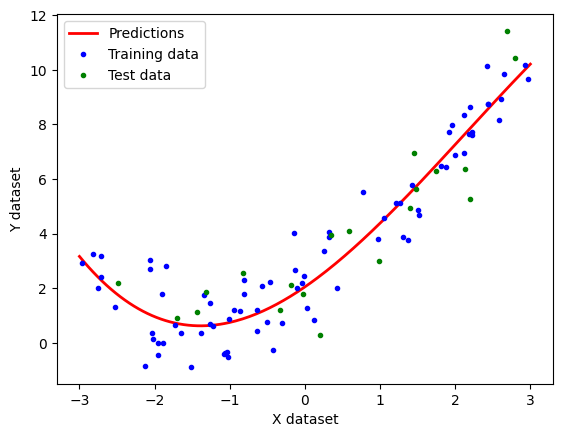

In [32]:
y_new = regression_poly.predict(X_new_poly)
plt.plot(X_new, y_new, "r", linewidth=2, label="Predictions")
plt.plot(X_train, y_train, "b.", label='Training data')
plt.plot(X_test, y_test, "g.", label='Test data')
plt.xlabel('X dataset')
plt.ylabel('Y dataset')
plt.legend()
plt.show()